In [76]:
import statistics as s 
data = [10, 20, 20, 30, 40] 
print("Mean:", s.mean(data)) 
print("Median:", s.median(data)) 
print("Mode:", s.mode(data)) 
print("Variance:", s.variance(data)) 
print("Standard Deviation:", s.stdev(data)) 

Mean: 24
Median: 20
Mode: 20
Variance: 130
Standard Deviation: 11.40175425099138


In [75]:
import pandas as pd 
import numpy as np 
# Sample dataset 
data = { 
'Age': [25, 30, np.nan, 40, 120], 
'Salary': [50000, 60000, 55000, np.nan, 58000], 
'City': ['A', 'B', 'A', 'C', 'B'] 
} 
df = pd.DataFrame(data) 
print("Original Data:\n", df) 
# a) Attribute Selection – choose needed columns 
df = df[['Age', 'Salary']] 
print("\nAfter Attribute Selection:\n", df) 
# b) Handling Missing Values – fill with mean 
df['Age'].fillna(df['Age'].mean()) 
df['Salary'].fillna(df['Salary'].mean()) 
print("\nAfter Handling Missing Values:\n", df) 
# c) Discretization – convert Age into bins 
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 60, 150], labels=['Young', 'Adult', 'Senior']) 
print("\nAfter Discretization:\n", df) 
# d) Elimination of Outliers – remove values beyond 3*std 
for col in ['Age', 'Salary']: 
    mean, std = df[col].mean(), df[col].std() 
    df = df[(df[col] >= mean - 3*std) & (df[col] <= mean + 3*std)] 
print("\nAfter Removing Outliers:\n", df)

Original Data:
      Age   Salary City
0   25.0  50000.0    A
1   30.0  60000.0    B
2    NaN  55000.0    A
3   40.0      NaN    C
4  120.0  58000.0    B

After Attribute Selection:
      Age   Salary
0   25.0  50000.0
1   30.0  60000.0
2    NaN  55000.0
3   40.0      NaN
4  120.0  58000.0

After Handling Missing Values:
      Age   Salary
0   25.0  50000.0
1   30.0  60000.0
2    NaN  55000.0
3   40.0      NaN
4  120.0  58000.0

After Discretization:
      Age   Salary Age_Group
0   25.0  50000.0     Young
1   30.0  60000.0     Young
2    NaN  55000.0       NaN
3   40.0      NaN     Adult
4  120.0  58000.0    Senior

After Removing Outliers:
      Age   Salary Age_Group
0   25.0  50000.0     Young
1   30.0  60000.0     Young
4  120.0  58000.0    Senior


In [61]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
X_train = np.array([[1,2], [2,3], [3,4], [6,7], [7,3]])
y_train = np.array(['A', 'B', 'C', 'D', 'E'])
X_test = np.array([[7,9], [2,4], [3,3]])  
y_test = np.array(['D', 'B', 'C'])   

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)


Predicted labels: ['D' 'B' 'B']
Accuracy: 0.6666666666666666


In [64]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
X_train = np.array([[1,2], [2,3], [3,4], [6,7], [7,3]])
y_train = np.array([10, 20, 30, 40, 50])

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_test = np.array([50])    
X_test = np.array([[7, 9]])
y_pred = knn.predict(X_test)

print("Predicted value for (7,9):", y_pred[0])

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Predicted value for (7,9): 45.0
Mean Squared Error: 25.0


Default Accuracy: 0.9555555555555556
Tuned Accuracy: 0.9555555555555556
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


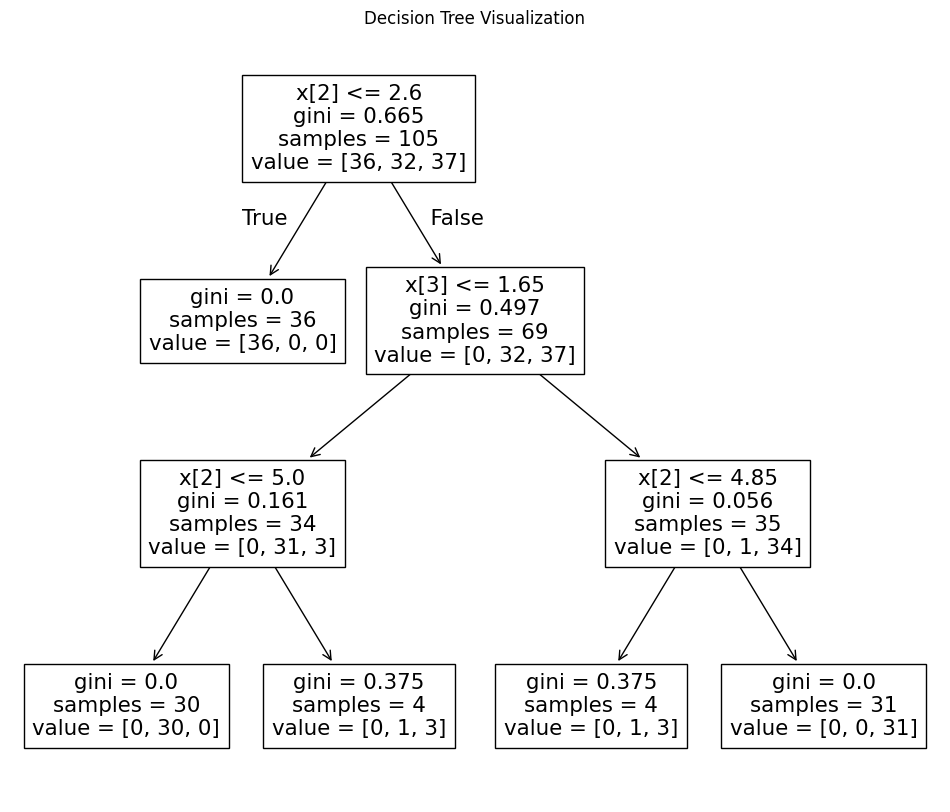

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# Step 1: Simple Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred1 = dt.predict(X_test)
print("Default Accuracy:", accuracy_score(y_test, pred1))

# Step 2: Parameter Tuning using GridSearch
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid.fit(X_train, y_train)

# Step 3: Best Model
best_dt = grid.best_estimator_
pred2 = best_dt.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, pred2))
print("Best Parameters:", grid.best_params_)

plt.figure(figsize=(10,10))
plot_tree(best_dt)
plt.title('Decision Tree Visualization')
plt.show()


Mean Squared Error: 0.6324522278507829


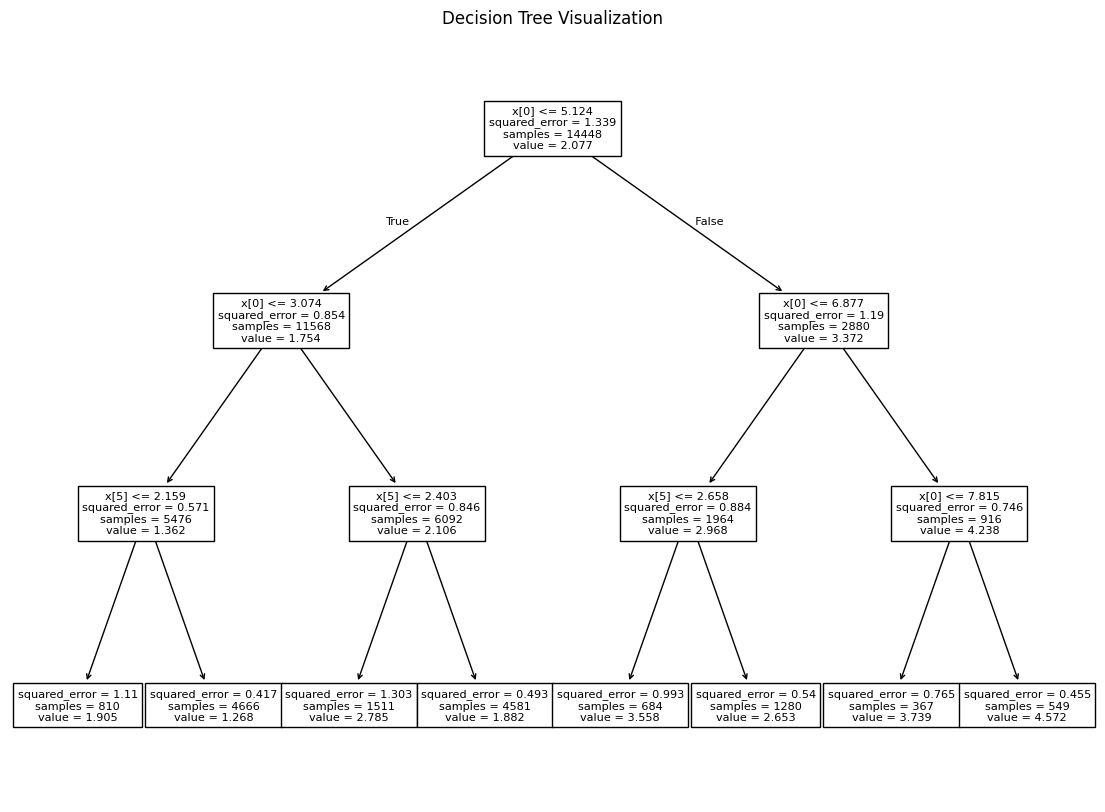

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and fit model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
plt.figure(figsize=(14,10))
plot_tree(model)
plt.title('Decision Tree Visualization')
plt.show()

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error
# --- Random Forest Classification --- 
iris = load_iris() 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) 
clf = RandomForestClassifier(n_estimators=100) 
clf.fit(X_train, y_train) 
y_pred_c = clf.predict(X_test) 
print("Random Forest Classification Accuracy:", accuracy_score(y_test, y_pred_c)) 
# --- Random Forest Regression ---
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3, random_state=1)
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)
y_pred_r = reg.predict(X_test)
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_r))

Random Forest Classification Accuracy: 0.9555555555555556
Random Forest Regression MSE: 0.2581488449383025


In [68]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
# Load dataset 
data = load_iris() 
X, y = data.data, data.target 
# Split data (70% train, 30% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# Create and train model 
model = GaussianNB() 
model.fit(X_train, y_train) 
# Predict and evaluate 
y_pred = model.predict(X_test) 
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naïve Bayes Accuracy: 0.9333333333333333


In [70]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
# Load dataset 
data = load_iris() 
X, y = data.data, data.target 
# Split data (70% train, 30% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# Create and train SVM model 
model = SVC(kernel='linear')   # kernel can be 'linear', 'poly', or 'rbf' 
model.fit(X_train, y_train) 
# Predict and evaluate 
y_pred = model.predict(X_test) 
print("SVM Classification Accuracy:", accuracy_score(y_test, y_pred))

SVM Classification Accuracy: 1.0


In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import numpy as np 
# Sample data (X = Study Hours, y = Marks) 
X = np.array([[1], [2], [3], [4], [5]]) 
y = np.array([10, 20, 30, 40, 50]) 
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# Create and train model 
model = LinearRegression() 
model.fit(X_train, y_train) 
# Predict and evaluate 
y_pred = model.predict(X_test) 
print("Predicted Values:", y_pred) 
print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) 
print("Slope (m):", model.coef_[0]) 
print("Intercept (c):", model.intercept_) 

Predicted Values: [30. 20.]
Mean Squared Error: 0.0
Slope (m): 10.0
Intercept (c): 0.0


In [72]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
# Load dataset 
data = load_iris() 
X, y = data.data, data.target 
# Split data (70% train, 30% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# Create and train model 
model = LogisticRegression(max_iter=200) 
model.fit(X_train, y_train) 
 
# Predict and evaluate 
y_pred = model.predict(X_test) 
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9777777777777777


K-Means Performance Evaluation:
K = 1, Sum of Euclidean Distances = 829.80
K = 2, Sum of Euclidean Distances = 591.52
K = 3, Sum of Euclidean Distances = 355.10
K = 4, Sum of Euclidean Distances = 222.89
K = 5, Sum of Euclidean Distances = 211.77
K = 6, Sum of Euclidean Distances = 199.79
K = 7, Sum of Euclidean Distances = 192.77
K = 8, Sum of Euclidean Distances = 177.36
K = 9, Sum of Euclidean Distances = 171.65
K = 10, Sum of Euclidean Distances = 162.04


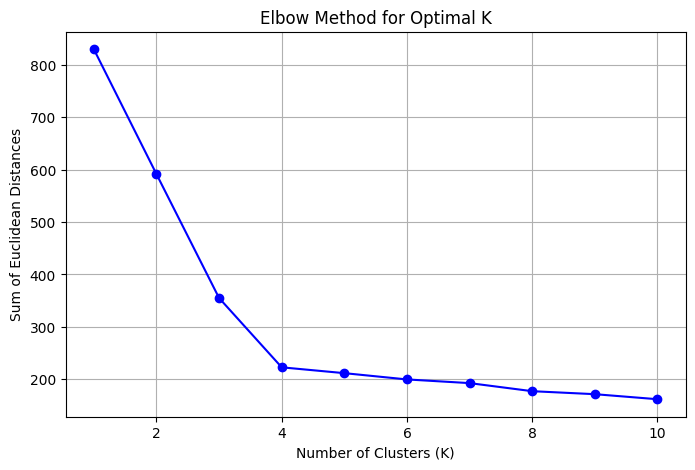

In [74]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
# Step 1: Generate synthetic dataset 
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) 
# Step 2: Function to evaluate performance for different values of K 
def evaluate_kmeans(X, max_k=10): 
    distortions = []  # To store the sum of distances for each K 
    Ks = range(1, max_k + 1) 
    for k in Ks: 
        kmeans = KMeans(n_clusters=k, random_state=0) 
        kmeans.fit(X) 
        # Calculate the sum of Euclidean distances of each point from its nearest cluster center 
        distortion = np.sum(np.min(kmeans.transform(X), axis=1)) 
        distortions.append(distortion) 
    return Ks, distortions 
# Step 3: Evaluate K from 1 to 10 
Ks, distortions = evaluate_kmeans(X, 10) 
# Step 4: Display results 
print("K-Means Performance Evaluation:") 
for k, dist in zip(Ks, distortions): 
    print(f"K = {k}, Sum of Euclidean Distances = {dist:.2f}") 
# Step 5: Plot the Elbow Curve 
plt.figure(figsize=(8, 5)) 
plt.plot(Ks, distortions, marker='o', color='blue') 
plt.title('Elbow Method for Optimal K') 
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Sum of Euclidean Distances') 
plt.grid(True) 
plt.show()